# PART 1(PROBABILITY)

In [1]:
import numpy                     as     np
import pandas                    as     pd
from   scipy.stats               import ttest_1samp, ttest_ind
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm

QUESTION1

In [2]:
n = 10

In [3]:
p = 0.22

In [4]:
k=np.arange(0,11)

In [5]:
binomial = stats.binom.pmf(k,n,p)

In [6]:
binomial

array([8.33577583e-02, 2.35111626e-01, 2.98410910e-01, 2.24445813e-01,
       1.10784151e-01, 3.74961742e-02, 8.81320334e-03, 1.42044303e-03,
       1.50239167e-04, 9.41669990e-06, 2.65599228e-07])

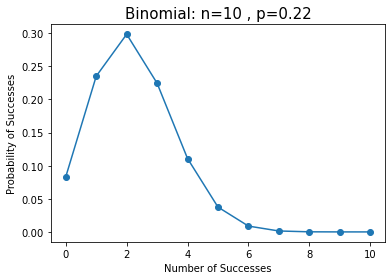

In [7]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

In [8]:
binomial[0]

0.08335775831236203

QUESTION 2

In [9]:
binomial[1]

0.23511162600922625

QUESTION 3

In [10]:
binomial[0] + binomial[1] + binomial[2]

0.6168802942563751

QUESTION 4

In [11]:
(1-(binomial[0] + binomial[1] + binomial[2]))

0.38311970574362486

# PART -II - Hypothesis Testing

In [12]:
data = pd.read_csv('payment_data.csv')
data.head()


,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,November,2011,11,2011-11-01,2011-11-30,Allahabad Bank,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.0,102.5
1,November,2011,11,2011-11-01,2011-11-30,Andhra Bank,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.4,451.1
2,November,2011,11,2011-11-01,2011-11-30,Bank of Baroda,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.7,695.3
3,November,2011,11,2011-11-01,2011-11-30,Bank of India,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.8,624.8
4,November,2011,11,2011-11-01,2011-11-30,Bank of Maharashtra,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.3,216.1


QUESTION 1

In [13]:
data.shape

(5592, 20)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5592 entries, 0 to 5591
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   month                               5592 non-null   object 
 1   year                                5592 non-null   int64  
 2   month_number                        5592 non-null   int64  
 3   start_date                          5592 non-null   object 
 4   end_date                            5592 non-null   object 
 5   bank_name                           5592 non-null   object 
 6   no_atms_on_site                     5592 non-null   int64  
 7   no_atms_off_site                    5592 non-null   int64  
 8   no_pos_on_line                      5592 non-null   int64  
 9   no_pos_off_line                     5591 non-null   float64
 10  no_credit_cards                     5589 non-null   float64
 11  no_credit_card_atm_txn              5592 no

QUESTION 2

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5592.0,2.015076e+03,2.491967e+00,2011.0,2013.000000,2.015000e+03,2.017000e+03,2019.0
month_number,5592.0,6.407904e+00,3.365489e+00,1.0,4.000000,6.000000e+00,9.000000e+00,12.0
no_atms_on_site,5592.0,1.544657e+03,3.068095e+03,0.0,168.000000,6.915000e+02,1.686000e+03,31749.0
no_atms_off_site,5592.0,1.410715e+03,3.663979e+03,0.0,109.000000,4.010000e+02,8.270000e+02,33209.0
no_pos_on_line,5592.0,3.048513e+04,9.241177e+04,0.0,0.000000,1.769000e+03,1.090800e+04,988458.0
no_pos_off_line,5591.0,1.152805e+02,8.292143e+02,0.0,0.000000,0.000000e+00,0.000000e+00,13945.0
no_credit_cards,5589.0,4.684503e+05,1.390965e+06,0.0,0.000000,5.496000e+03,1.341290e+05,13138330.0
no_credit_card_atm_txn,5592.0,8.157823e+03,2.378192e+04,0.0,0.000000,1.800000e+01,3.942750e+03,202780.0
no_credit_card_pos_txn,5592.0,1.370919e+06,4.562072e+06,0.0,0.000000,7.938500e+03,1.750998e+05,48011222.0
no_credit_card_atm_txn_value_in_mn,5592.0,3.269451e+03,9.775719e+04,0.0,0.000000,2.000000e-01,2.239340e+01,5649796.0


QUESTION 3

In [16]:
data.isnull().sum()

month                                 0
year                                  0
month_number                          0
start_date                            0
end_date                              0
bank_name                             0
no_atms_on_site                       0
no_atms_off_site                      0
no_pos_on_line                        0
no_pos_off_line                       1
no_credit_cards                       3
no_credit_card_atm_txn                0
no_credit_card_pos_txn                0
no_credit_card_atm_txn_value_in_mn    0
no_credit_card_pos_txn_value_in_mn    0
no_debit_cards                        0
no_debit_card_atm_txn                 0
no_debit_card_pos_txn                 0
no_debit_card_atm_txn_value_in_mn     0
no_debit_card_pos_txn_value_in_mn     0
dtype: int64

In [17]:
print("data:",data.median())

data: year                                  2.015000e+03
month_number                          6.000000e+00
no_atms_on_site                       6.915000e+02
no_atms_off_site                      4.010000e+02
no_pos_on_line                        1.769000e+03
no_pos_off_line                       0.000000e+00
no_credit_cards                       5.496000e+03
no_credit_card_atm_txn                1.800000e+01
no_credit_card_pos_txn                7.938500e+03
no_credit_card_atm_txn_value_in_mn    2.000000e-01
no_credit_card_pos_txn_value_in_mn    2.043485e+01
no_debit_cards                        3.067924e+06
no_debit_card_atm_txn                 3.179442e+06
no_debit_card_pos_txn                 3.936775e+05
no_debit_card_atm_txn_value_in_mn     1.210020e+04
no_debit_card_pos_txn_value_in_mn     6.403500e+02
dtype: float64


C:\Users\PRIYAL~1.PAN\AppData\Local\Temp/ipykernel_17432/3242858003.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("data:",data.median())


In [18]:
pd.DataFrame({'value': data['no_pos_off_line'], 'Missing?': data['no_pos_off_line'].isnull()})

,value,Missing?
0,0.0,False
1,0.0,False
2,0.0,False
3,501.0,False
4,404.0,False
...,...,...
5587,0.0,False
5588,0.0,False
5589,0.0,False
5590,0.0,False


In [19]:
data['no_pos_off_line'].fillna(data.no_pos_off_line.median(), inplace = True)  
data

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,November,2011,11,2011-11-01,2011-11-30,Allahabad Bank,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.000000,102.500000
1,November,2011,11,2011-11-01,2011-11-30,Andhra Bank,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.400000,451.100000
2,November,2011,11,2011-11-01,2011-11-30,Bank of Baroda,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.700000,695.300000
3,November,2011,11,2011-11-01,2011-11-30,Bank of India,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.800000,624.800000
4,November,2011,11,2011-11-01,2011-11-30,Bank of Maharashtra,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.300000,216.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,August,2019,8,2019-08-01,2019-08-31,JANA SMALL FINANCE BANK LIMITED,122,3,0,0.0,0.0,0,0,0.0,0.0,499608.0,308561.0,65579.0,15323.193890,744.128791
5588,August,2019,8,2019-08-01,2019-08-31,NORTH EAST SMALL FINANCE BANK LIMITED,0,0,0,0.0,0.0,0,0,0.0,0.0,77894.0,12162.0,3532.0,423.053800,125.715148
5589,August,2019,8,2019-08-01,2019-08-31,SURYODAY SMALL FINANCE BANK LIMITED,25,1,0,0.0,0.0,0,0,0.0,0.0,25567.0,26400.0,13358.0,470.029000,135.081704
5590,August,2019,8,2019-08-01,2019-08-31,UJJIVAN SMALL FINANCE BANK LIMITED,427,3,0,0.0,0.0,0,0,0.0,0.0,3934133.0,2102691.0,365036.0,85077.473000,3114.916755


In [20]:
pd.DataFrame({'value': data['no_credit_cards'], 'Missing?': data['no_credit_cards'].isnull()})

,value,Missing?
0,0.0,False
1,121514.0,False
2,70776.0,False
3,119248.0,False
4,23436.0,False
...,...,...
5587,0.0,False
5588,0.0,False
5589,0.0,False
5590,0.0,False


In [21]:
data['no_credit_cards'].fillna(data.no_credit_cards.median(), inplace = True)  
data

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn
0,November,2011,11,2011-11-01,2011-11-30,Allahabad Bank,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.000000,102.500000
1,November,2011,11,2011-11-01,2011-11-30,Andhra Bank,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.400000,451.100000
2,November,2011,11,2011-11-01,2011-11-30,Bank of Baroda,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.700000,695.300000
3,November,2011,11,2011-11-01,2011-11-30,Bank of India,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.800000,624.800000
4,November,2011,11,2011-11-01,2011-11-30,Bank of Maharashtra,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.300000,216.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,August,2019,8,2019-08-01,2019-08-31,JANA SMALL FINANCE BANK LIMITED,122,3,0,0.0,0.0,0,0,0.0,0.0,499608.0,308561.0,65579.0,15323.193890,744.128791
5588,August,2019,8,2019-08-01,2019-08-31,NORTH EAST SMALL FINANCE BANK LIMITED,0,0,0,0.0,0.0,0,0,0.0,0.0,77894.0,12162.0,3532.0,423.053800,125.715148
5589,August,2019,8,2019-08-01,2019-08-31,SURYODAY SMALL FINANCE BANK LIMITED,25,1,0,0.0,0.0,0,0,0.0,0.0,25567.0,26400.0,13358.0,470.029000,135.081704
5590,August,2019,8,2019-08-01,2019-08-31,UJJIVAN SMALL FINANCE BANK LIMITED,427,3,0,0.0,0.0,0,0,0.0,0.0,3934133.0,2102691.0,365036.0,85077.473000,3114.916755


QUESTION 4

In [22]:
dupes = data.duplicated()
sum(dupes)

1

In [23]:
data.bank_name.drop_duplicates().head(10)

0           Allahabad Bank
1              Andhra Bank
2           Bank of Baroda
3            Bank of India
4      Bank of Maharashtra
5              Canara Bank
6    Central Bank of India
7         Corporation Bank
8                Dena Bank
9              Indian Bank
Name: bank_name, dtype: object

In [24]:
sorted(data.bank_name.unique())

['ADITYA BIRLA IDEA PAYMENTS BANK',
 'AIRTEL PAYMENTS BANK',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS',
 'ANDHRA BANK',
 'AU SMALL FINANCE BANK LIMITED',
 'AXIS BANK LTD',
 'Aditya Birla Idea Payments Bank',
 'Airtel Payments Bank',
 'Allahabad Bank',
 'American Express Bkg. Corp.',
 'Andhra Bank',
 'Au Small Finance Bank Limited',
 'Axis Bank Ltd.',
 'BANDHAN BANK',
 'BANDHAN BANK LTD',
 'BANK OF AMERICA',
 'BANK OF BARODA',
 'BANK OF INDIA',
 'BANK OF MAHARASHTRA',
 'BARCLAYS BANK PLC',
 'Bandhan Bank Ltd',
 'Bank of America',
 'Bank of Baroda',
 'Bank of India',
 'Bank of Maharashtra',
 'Barclays Bank',
 'CANARA BANK',
 'CAPITAL SMALL FINANCE BANK LIMITED',
 'CATHOLIC SYRIAN BANK LTD',
 'CENTRAL BANK OF INDIA',
 'CITI BANK',
 'CITY UNION BANK',
 'CORPORATION BANK',
 'Canara Bank',
 'Capital Small Finance Bank Limited',
 'Catholic Syrian Bank Ltd.',
 'Central Bank of India',
 'Citibank',
 'City Union Bank Ltd',
 'Corporation Bank',
 'DBS BANK',
 'DBS Ltd.',
 'DCB BANK LTD',
 'DCB BANK L

In [25]:
len(data.bank_name.unique())

154

In [26]:
data.bank_name=data.bank_name.str.upper()
data.bank_name = data.bank_name.replace(["LIMITED","LTD.","BKG. CORP","PLC","LTD","THE"],"",regex=True)
data.bank_name = data.bank_name.str.replace(".","",regex=True)
data.bank_name = data.bank_name.replace(["CITIBANK","DBS BANK","TAMILNADU"],["CITI BANK","DBS","TAMILNAD"],regex=True)
data.bank_name = data.bank_name.replace(["LAXMI","&"],["LAKSHMI","AND"],regex=True)
data.bank_name = data.bank_name.str.split().str.join(" ")
data.bank_name = data.bank_name.str.strip()

sorted(data.bank_name.unique())

['ADITYA BIRLA IDEA PAYMENTS BANK',
 'AIRTEL PAYMENTS BANK',
 'ALLAHABAD BANK',
 'AMERICAN EXPRESS',
 'ANDHRA BANK',
 'AU SMALL FINANCE BANK',
 'AXIS BANK',
 'BANDHAN BANK',
 'BANK OF AMERICA',
 'BANK OF BARODA',
 'BANK OF INDIA',
 'BANK OF MAHARASHTRA',
 'BARCLAYS BANK',
 'CANARA BANK',
 'CAPITAL SMALL FINANCE BANK',
 'CATHOLIC SYRIAN BANK',
 'CENTRAL BANK OF INDIA',
 'CITI BANK',
 'CITY UNION BANK',
 'CORPORATION BANK',
 'DBS',
 'DCB BANK',
 'DENA BANK',
 'DEUTSCHE BANK',
 'DEVELOPMENT CREDIT BANK',
 'DHANALAKSHMI BANK',
 'EQUITAS SMALL FINANCE BANK',
 'ESAF SMALL FINANCE BANK',
 'FEDERAL BANK',
 'FINCARE SMALL FINANCE BANK',
 'FINO PAYMENTS BANK',
 'FIRSTRAND BANK',
 'HDFC BANK',
 'HONGKONG AND SHANGHAI BKG CORPN',
 'HSBC',
 'ICICI BANK',
 'IDBI',
 'IDFC BANK',
 'INDIA POST PAYMENTS BANK',
 'INDIAN BANK',
 'INDIAN OVERSEAS BANK',
 'INDUSIND BANK',
 'ING VYSYA BANK',
 'JAMMU AND KASHMIR BANK',
 'JANA SMALL FINANCE BANK',
 'JIO PAYMENTS BANK',
 'KARNATAKA BANK',
 'KARUR VYSYA BANK',
 

In [27]:
len(data.bank_name.unique())

79

QUESTION 5

<AxesSubplot:xlabel='year'>

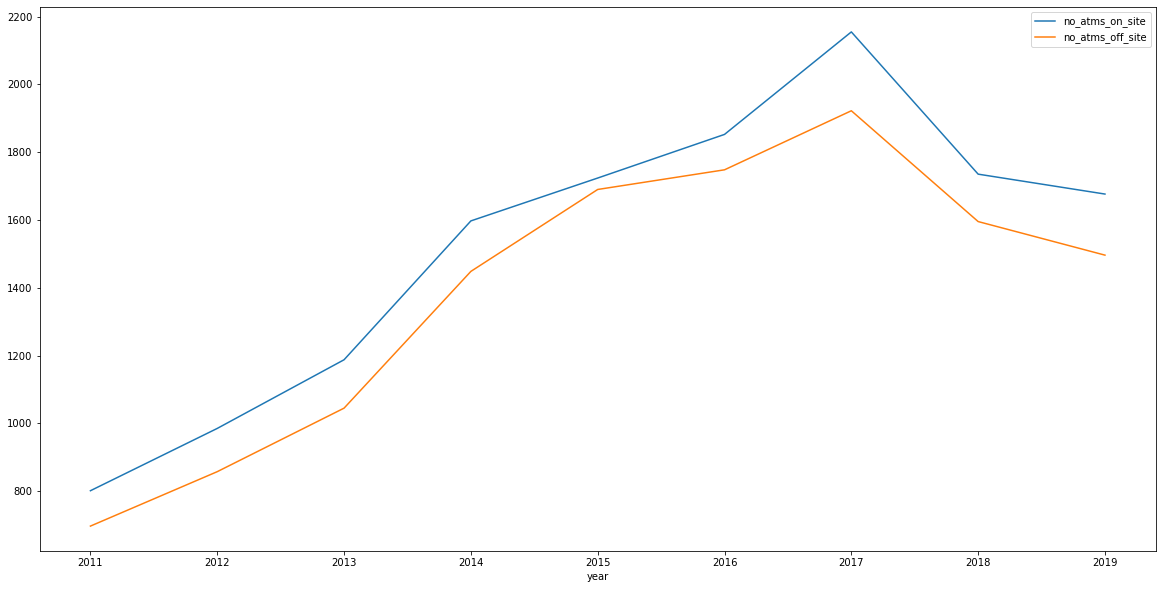

In [28]:
group_year_mean =  data[['no_atms_on_site','no_atms_off_site','year']].groupby('year').mean()
group_year_mean.plot(figsize=(20,10))

QUESTION 6:

<AxesSubplot:xlabel='year'>

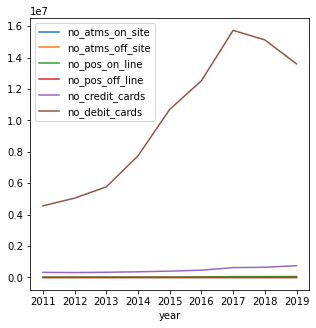

In [29]:
highest_growth1 = data[['no_atms_on_site','no_atms_off_site','no_pos_on_line','no_pos_off_line','no_credit_cards','no_debit_cards','year']].groupby('year').mean()
highest_growth1.plot(figsize=(5,5))

<AxesSubplot:xlabel='year'>

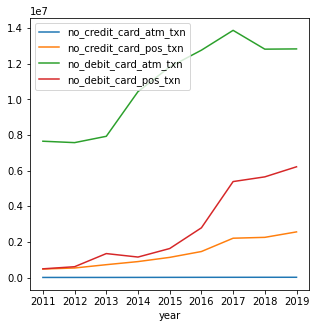

In [30]:
highest_growth2 = data[['no_credit_card_atm_txn','no_credit_card_pos_txn','no_debit_card_atm_txn','no_debit_card_pos_txn','year']].groupby('year').mean()
highest_growth2.plot(figsize=(5,5))


<AxesSubplot:xlabel='year'>

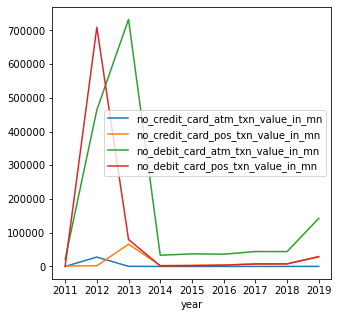

In [31]:
highest_growth3 = data[['no_credit_card_atm_txn_value_in_mn','no_credit_card_pos_txn_value_in_mn','no_debit_card_atm_txn_value_in_mn','no_debit_card_pos_txn_value_in_mn','year']].groupby('year').mean()
highest_growth3.plot(figsize=(5,5))


QUESTION7

In [32]:
data['no_atms_on_site']. value_counts(). head(5)

0     400
13     78
5      56
12     48
1      40
Name: no_atms_on_site, dtype: int64

In [33]:
top_bank=data[['month', 'year','bank_name','no_atms_on_site']]
top_bank=top_bank.loc[top_bank['year']==2019].loc[top_bank['month']=='August'].groupby('bank_name', sort=True).sum().sort_values(by='no_atms_on_site',ascending=False).reset_index()
top_bank.head(5)

,bank_name,year,no_atms_on_site
0,STATE BANK OF INDIA,2019,25667
1,BANK OF BARODA,2019,9400
2,HDFC BANK,2019,6079
3,AXIS BANK,2019,5292
4,PUNJAB NATIONAL BANK,2019,5277


In [34]:
top_bank['percentage'] = top_bank['no_atms_on_site']/top_bank['no_atms_on_site'].sum()
top_bank=top_bank.reset_index()
top_bank.head(5)

,index,bank_name,year,no_atms_on_site,percentage
0,0,STATE BANK OF INDIA,2019,25667,0.233663
1,1,BANK OF BARODA,2019,9400,0.085574
2,2,HDFC BANK,2019,6079,0.055341
3,3,AXIS BANK,2019,5292,0.048177
4,4,PUNJAB NATIONAL BANK,2019,5277,0.048040


<AxesSubplot:xlabel='bank_name', ylabel='percentage'>

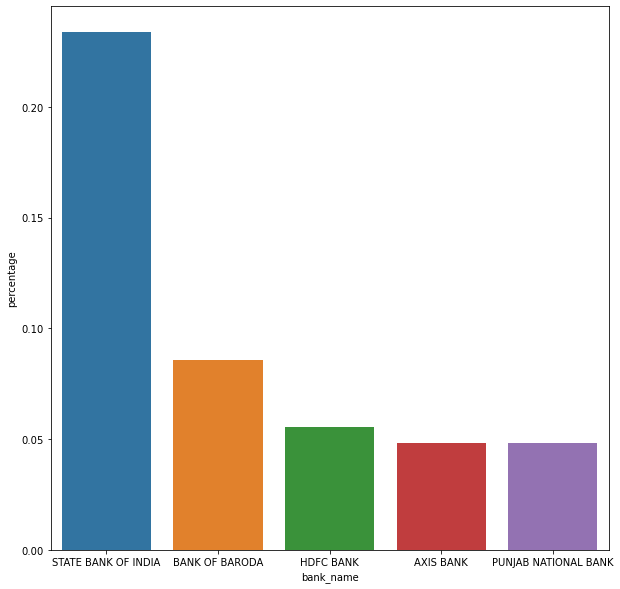

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x='bank_name',y='percentage', data=top_bank.head(5))


QUESTION 8

In [36]:
data.columns

Index(['month', 'year', 'month_number', 'start_date', 'end_date', 'bank_name',
       'no_atms_on_site', 'no_atms_off_site', 'no_pos_on_line',
       'no_pos_off_line', 'no_credit_cards', 'no_credit_card_atm_txn',
       'no_credit_card_pos_txn', 'no_credit_card_atm_txn_value_in_mn',
       'no_credit_card_pos_txn_value_in_mn', 'no_debit_cards',
       'no_debit_card_atm_txn', 'no_debit_card_pos_txn',
       'no_debit_card_atm_txn_value_in_mn',
       'no_debit_card_pos_txn_value_in_mn'],
      dtype='object')

In [37]:
data['debit_trans'] = data[['no_credit_card_atm_txn_value_in_mn',
       'no_credit_card_pos_txn_value_in_mn',
       'no_debit_card_atm_txn_value_in_mn',
       'no_debit_card_pos_txn_value_in_mn']].sum(axis=1)
data

,month,year,month_number,start_date,end_date,bank_name,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,...,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn,debit_trans
0,November,2011,11,2011-11-01,2011-11-30,ALLAHABAD BANK,207,109,0,0.0,...,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.000000,102.500000,1302.500000
1,November,2011,11,2011-11-01,2011-11-30,ANDHRA BANK,479,554,2122,0.0,...,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.400000,451.100000,18489.700000
2,November,2011,11,2011-11-01,2011-11-30,BANK OF BARODA,1242,580,4332,0.0,...,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.700000,695.300000,26053.900000
3,November,2011,11,2011-11-01,2011-11-30,BANK OF INDIA,838,792,1930,501.0,...,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.800000,624.800000,7965.000000
4,November,2011,11,2011-11-01,2011-11-30,BANK OF MAHARASHTRA,359,141,77,404.0,...,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.300000,216.100000,6446.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,August,2019,8,2019-08-01,2019-08-31,JANA SMALL FINANCE BANK,122,3,0,0.0,...,0,0,0.0,0.0,499608.0,308561.0,65579.0,15323.193890,744.128791,16067.322681
5588,August,2019,8,2019-08-01,2019-08-31,NORTH EAST SMALL FINANCE BANK,0,0,0,0.0,...,0,0,0.0,0.0,77894.0,12162.0,3532.0,423.053800,125.715148,548.768949
5589,August,2019,8,2019-08-01,2019-08-31,SURYODAY SMALL FINANCE BANK,25,1,0,0.0,...,0,0,0.0,0.0,25567.0,26400.0,13358.0,470.029000,135.081704,605.110704
5590,August,2019,8,2019-08-01,2019-08-31,UJJIVAN SMALL FINANCE BANK,427,3,0,0.0,...,0,0,0.0,0.0,3934133.0,2102691.0,365036.0,85077.473000,3114.916755,88192.389755


In [38]:
top_transaction = data[['bank_name','debit_trans']].groupby('bank_name',sort=True).sum().sort_values('debit_trans', ascending=False)
top_transaction.head(5)

,debit_trans
bank_name,
STATE BANK OF INDIA,5.791317e+08
HDFC BANK,1.310728e+08
ICICI BANK,1.146125e+08
PUNJAB NATIONAL BANK,8.846763e+07
AXIS BANK,7.319479e+07


<AxesSubplot:xlabel='year'>

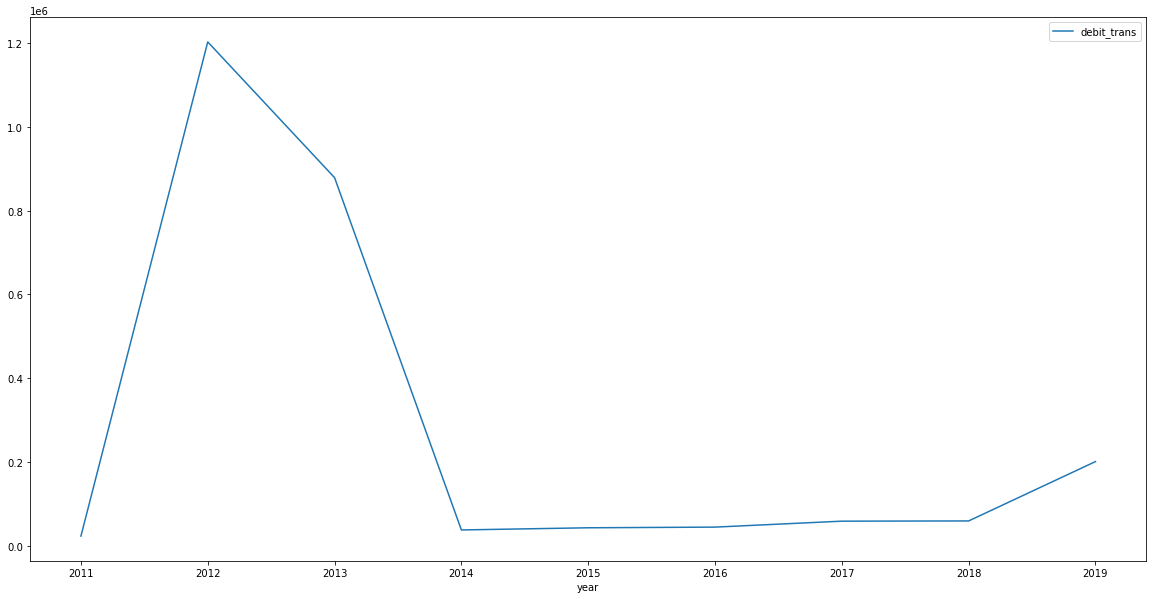

In [39]:
total_trans =  data[['debit_trans','year']].groupby('year').mean()
total_trans.plot(figsize=(20,10))

In [40]:
data.drop(['month', 'year','month_number', 'start_date', 'end_date', 'bank_name'],axis=1)

,no_atms_on_site,no_atms_off_site,no_pos_on_line,no_pos_off_line,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_cards,no_debit_card_atm_txn,no_debit_card_pos_txn,no_debit_card_atm_txn_value_in_mn,no_debit_card_pos_txn_value_in_mn,debit_trans
0,207,109,0,0.0,0.0,0,0,0.0,0.0,1190454.0,540824.0,54356.0,1200.000000,102.500000,1302.500000
1,479,554,2122,0.0,121514.0,3243,92370,28.5,234.7,6698887.0,6871864.0,325458.0,17775.400000,451.100000,18489.700000
2,1242,580,4332,0.0,70776.0,2046,72198,1.5,190.4,7307099.0,6715369.0,462172.0,25166.700000,695.300000,26053.900000
3,838,792,1930,501.0,119248.0,7824,88123,54.8,236.6,8247225.0,2048888.0,474882.0,7048.800000,624.800000,7965.000000
4,359,141,77,404.0,23436.0,110,15995,3.6,36.8,2286937.0,2055968.0,156694.0,6190.300000,216.100000,6446.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5587,122,3,0,0.0,0.0,0,0,0.0,0.0,499608.0,308561.0,65579.0,15323.193890,744.128791,16067.322681
5588,0,0,0,0.0,0.0,0,0,0.0,0.0,77894.0,12162.0,3532.0,423.053800,125.715148,548.768949
5589,25,1,0,0.0,0.0,0,0,0.0,0.0,25567.0,26400.0,13358.0,470.029000,135.081704,605.110704
5590,427,3,0,0.0,0.0,0,0,0.0,0.0,3934133.0,2102691.0,365036.0,85077.473000,3114.916755,88192.389755


<AxesSubplot:>

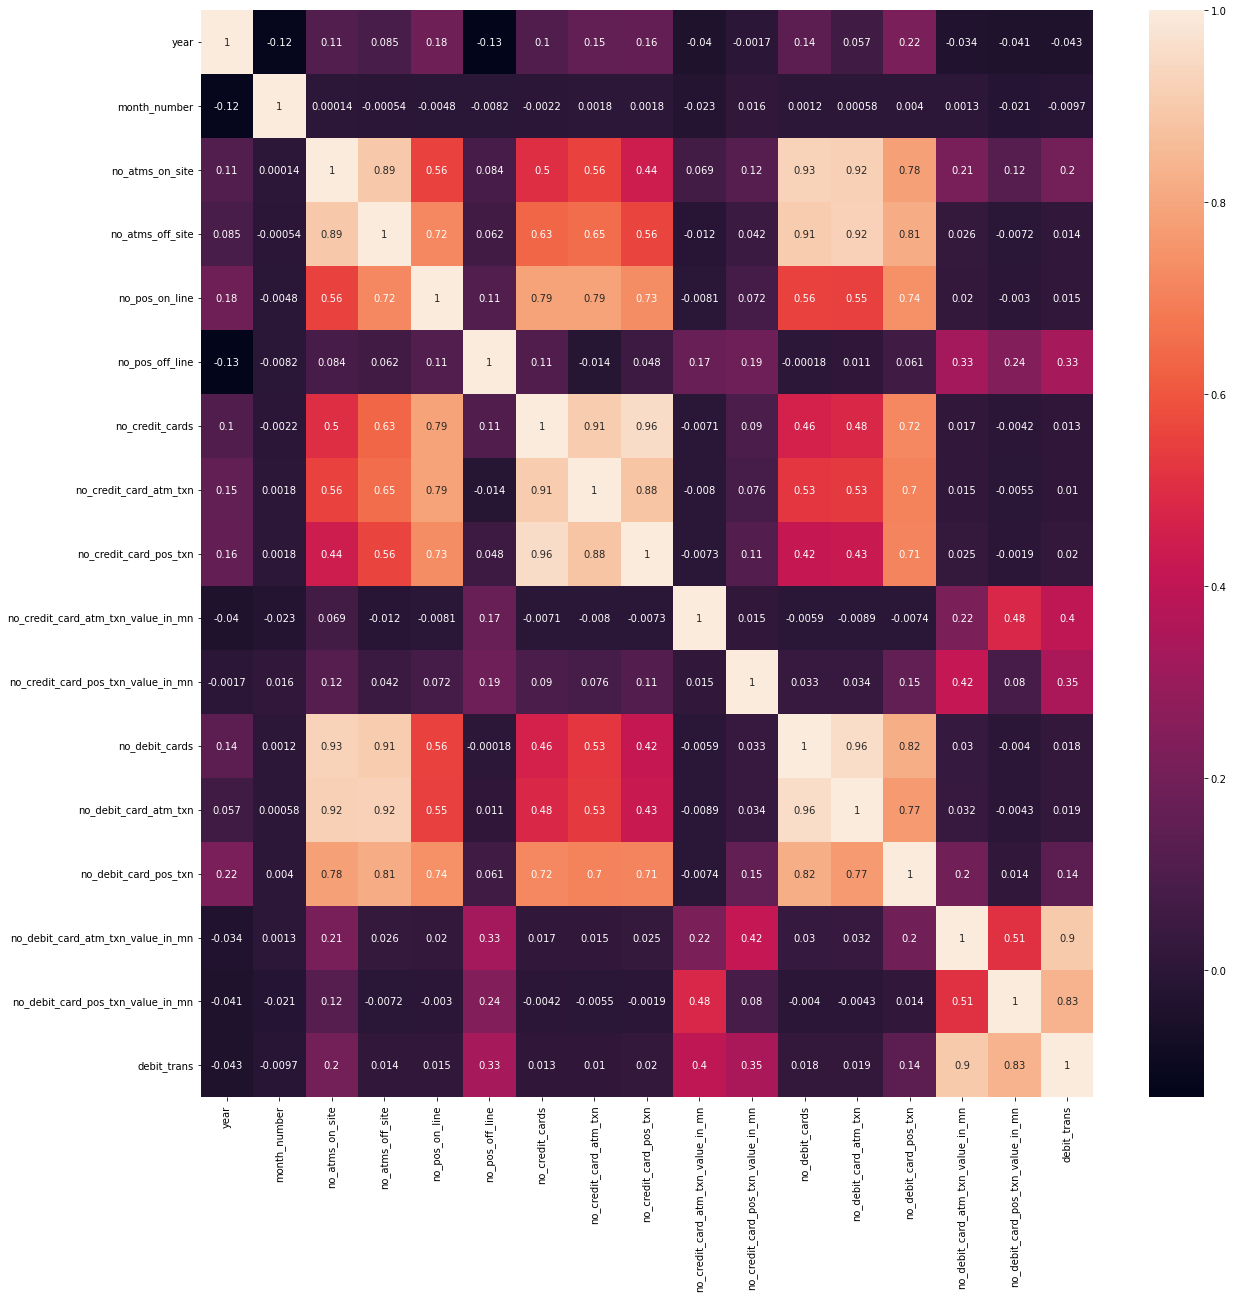

In [41]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot=True)

In [42]:
data_mean =  data[['no_debit_cards','no_credit_cards','year']].groupby('year').mean()
data_mean

,no_debit_cards,no_credit_cards
year,,
2011,4.560772e+06,323679.229039
2012,5.050287e+06,312298.846635
2013,5.769631e+06,331239.580227
2014,7.742777e+06,359458.319018
2015,1.070264e+07,400441.218654
2016,1.252634e+07,462194.675595
2017,1.573589e+07,626297.538462
2018,1.512873e+07,647151.870445
2019,1.360030e+07,748383.953578


In [43]:
#null_hypothesis:mean_no_debit_cards = mean_no_credit_cards
#Alternative_hypothesis:mean_no_debit_cards != mean_no_credit_cards

In [44]:
print("The sample size for this problem is",len(data_mean))

The sample size for this problem is 9


In [45]:
t_statistic, p_value  = ttest_ind(data_mean['no_debit_cards'],data_mean['no_credit_cards'])
print('tstat',t_statistic)    
print('P Value',p_value)  

tstat 6.5320381551835895
P Value 6.908168784546372e-06


In [46]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)
print("We cannot reject the null hypothesis since we dont have enough information")
print("We can see there is no great difference in the mean of the number of debit cards and the number of credit cards in the following years.")

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 6.908168784546372e-06
We cannot reject the null hypothesis since we dont have enough information
We can see there is no great difference in the mean of the number of debit cards and the number of credit cards in the following years.


In [47]:
data_mean =  data[['no_credit_card_atm_txn_value_in_mn','no_credit_card_pos_txn_value_in_mn','no_debit_card_atm_txn_value_in_mn', 'year']].groupby('year').mean()
data_mean

,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,no_debit_card_atm_txn_value_in_mn
year,,,
2011,18.853573,1419.503809,20952.889182
2012,27832.301798,1949.983450,463900.162420
2013,366.329197,66053.309020,732626.966603
2014,33.081063,2743.855176,33306.069799
2015,43.622301,3468.776426,37262.115525
2016,45.848766,4435.786693,36409.452558
2017,52.540916,7043.578067,44195.246385
2018,59.409138,7634.366399,44063.364070
2019,204.350276,29578.423667,142560.594638


In [48]:
#Null hypothesis: Groups means are equal (no variation in means of groups)
#H0:no_credit_card_atm_txn_value_in_mn = no_credit_card_pos_txn_value_in_mn = no_debit_card_atm_txn_value_in_mn
#Alternative hypothesis: At least, one group mean is different from other groups
#H1:no_credit_card_atm_txn_value_in_mn != no_credit_card_pos_txn_value_in_mn != no_debit_card_atm_txn_value_in_mn

In [49]:
#ANOVA TEST is to be used and significance level 0.05

In [50]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
formula = 'no_credit_card_atm_txn_value_in_mn ~ no_credit_card_pos_txn_value_in_mn + no_debit_card_atm_txn_value_in_mn'
model = ols(formula, data_mean).fit()
aov_table = anova_lm(model)
print(aov_table)


                                     df        sum_sq       mean_sq  \
no_credit_card_pos_txn_value_in_mn  1.0  2.617018e+07  2.617018e+07   
no_debit_card_atm_txn_value_in_mn   1.0  5.725820e+08  5.725820e+08   
Residual                            6.0  8.482968e+07  1.413828e+07   

                                            F    PR(>F)  
no_credit_card_pos_txn_value_in_mn   1.851016  0.222554  
no_debit_card_atm_txn_value_in_mn   40.498702  0.000707  
Residual                                  NaN       NaN  


In [51]:
bank_group= ['BANK OF BARODA',  'HDFC BANK']
data=data.loc[data['bank_name'].isin(bank_group)].groupby(['bank_name','year']).agg({'no_atms_on_site':'mean'}).reset_index()
data

,bank_name,year,no_atms_on_site
0,BANK OF BARODA,2011,1168.000000
1,BANK OF BARODA,2012,1479.750000
2,BANK OF BARODA,2013,2451.250000
3,BANK OF BARODA,2014,4288.166667
4,BANK OF BARODA,2015,5337.250000
5,BANK OF BARODA,2016,6209.500000
6,BANK OF BARODA,2017,6338.666667
7,BANK OF BARODA,2018,6110.333333
8,BANK OF BARODA,2019,8218.125000
9,HDFC BANK,2011,3149.888889


In [52]:
formula = '(no_atms_on_site ~ bank_name)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
bank_name   1.0  9.668674e+05  9.668674e+05  0.283483  0.601744
Residual   16.0  5.457069e+07  3.410668e+06       NaN       NaN
